In [1]:
import pandas as pd
import numpy as np

In [2]:
nyc=pd.read_csv('/home/labsuser/Aug/311_Service_Requests_from_2010_to_Present.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nyc.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [4]:
# created date needs to be converted to date format

nyc['Created Date']=pd.to_datetime(nyc['Created Date'])
nyc['Closed Date']=pd.to_datetime(nyc['Closed Date'])

In [5]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      364558 non-null  int64         
 1   Created Date                    364558 non-null  datetime64[ns]
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          364558 non-null  object        
 4   Agency Name                     364558 non-null  object        
 5   Complaint Type                  364558 non-null  object        
 6   Descriptor                      358057 non-null  object        
 7   Location Type                   364425 non-null  object        
 8   Incident Zip                    361560 non-null  float64       
 9   Incident Address                312859 non-null  object        
 10  Street Name                     312859 non-null  object 

In [6]:
nyc.isnull().sum(axis=0)

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [7]:
# for finding the no. of rows for each categorical value:
# no. of rows for each value of Agency

nyc['Agency'].value_counts()

NYPD    364558
Name: Agency, dtype: int64

In [8]:
nyc['Complaint Type'].value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

In [9]:
nyc['Descriptor'].value_counts()

No Access                         75888
Loud Music/Party                  69708
Posted Parking Sign Violation     27200
Partial Access                    24993
Loud Talking                      23810
With License Plate                21661
Blocked Hydrant                   19989
Commercial Overnight Parking      14997
Blocked Sidewalk                  13860
Car/Truck Music                   11940
Double Parked Blocking Traffic     7164
Engine Idling                      5323
Double Parked Blocking Vehicle     5167
Neglected                          5131
Banging/Pounding                   4959
Car/Truck Horn                     4478
Congestion/Gridlock                3237
Other (complaint details)          2489
In Prohibited Area                 2206
Overnight Commercial Storage       2102
Unlicensed                         1986
Unauthorized Bus Layover           1618
Truck Route Violation              1125
Tortured                           1041
In Public                           971


In [10]:
pd.crosstab(index=nyc['Complaint Type'],columns=nyc['Descriptor'])

Descriptor,After Hours - Licensed Est,Animal Waste,Banging/Pounding,Blocked Hydrant,Blocked Sidewalk,Building,Car/Truck Horn,Car/Truck Music,Chained,Chronic Speeding,...,Police Report Not Requested,Police Report Requested,Posted Parking Sign Violation,Tortured,Truck Route Violation,Unauthorized Bus Layover,Underage - Licensed Est,Unlicensed,Vehicle,With License Plate
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animal Abuse,0,0,0,0,0,0,0,0,695,0,...,0,0,0,1041,0,0,0,0,0,0
Animal in a Park,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Derelict Vehicle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21661
Disorderly Youth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drinking,93,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,345,0,0,0
Ferry Complaint,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Graffiti,0,0,0,0,0,0,0,0,0,0,...,35,122,0,0,0,0,0,0,0,0


In [11]:
nyc['Location Type'].value_counts()

Street/Sidewalk               301372
Store/Commercial               25217
Club/Bar/Restaurant            21527
Residential Building/House      8869
Park/Playground                 4871
House of Worship                1068
Residential Building             533
Highway                          265
House and Store                  245
Parking Lot                      167
Commercial                       108
Vacant Lot                        95
Roadway Tunnel                    43
Subway Station                    40
Bridge                             2
Ferry                              1
Park                               1
Terminal                           1
Name: Location Type, dtype: int64

In [14]:
nyc['Created Date'].value_counts()

2015-05-09 21:32:57    3
2015-07-23 00:40:29    3
2015-06-16 22:24:30    3
2015-02-11 22:56:36    3
2015-06-03 22:16:23    3
                      ..
2015-12-10 07:04:30    1
2015-02-14 00:39:28    1
2015-06-19 01:09:41    1
2015-09-17 23:11:57    1
2015-05-07 09:20:19    1
Name: Created Date, Length: 362018, dtype: int64

In [16]:
# request closing time
# closed - open time
# in timestamp
nyc['response_time']=nyc['Closed Date']-nyc['Created Date']

In [17]:
nyc['response_time']

0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Name: response_time, Length: 364558, dtype: timedelta64[ns]

In [18]:
# response time in days
nyc['response_days']=nyc['response_time']/np.timedelta64(1,'D')

In [19]:
nyc['response_days']

0         0.038542
1         0.060567
2         0.202477
3         0.323229
4         0.144259
            ...   
364553    0.429016
364554    0.097616
364555    0.013229
364556    0.111725
364557    0.115972
Name: response_days, Length: 364558, dtype: float64

In [20]:
# response time in hours
nyc['response_hours']=nyc['response_time']/np.timedelta64(1,'h')

In [21]:
nyc['response_hours']

0          0.925000
1          1.453611
2          4.859444
3          7.757500
4          3.462222
            ...    
364553    10.296389
364554     2.342778
364555     0.317500
364556     2.681389
364557     2.783333
Name: response_hours, Length: 364558, dtype: float64

In [ ]:
0 days 00:55:30 
2015-05-09 21:32:57 
yyyy-mm-dd hh mm ss/ 

In [22]:
# datetime64/np.timedelta64(1,'D') will give the values in days etc

In [23]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 56 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      364558 non-null  int64          
 1   Created Date                    364558 non-null  datetime64[ns] 
 2   Closed Date                     362177 non-null  datetime64[ns] 
 3   Agency                          364558 non-null  object         
 4   Agency Name                     364558 non-null  object         
 5   Complaint Type                  364558 non-null  object         
 6   Descriptor                      358057 non-null  object         
 7   Location Type                   364425 non-null  object         
 8   Incident Zip                    361560 non-null  float64        
 9   Incident Address                312859 non-null  object         
 10  Street Name                     312859 non-n

In [26]:
# nyc.isna().any()
nyc.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [28]:
# get the count for complaints by city
nyc['City'].value_counts()


BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
WOODHAVEN                3103
LONG ISLAND CITY         3028
SOUTH OZONE PARK         2668
FRESH MEADOWS            2453
RICHMOND HILL            2335
MIDDLE VILLAGE           2291
QUEENS VILLAGE           2251
FOREST HILLS             2122
JACKSON HEIGHTS          2106
REGO PARK                1807
BAYSIDE                  1550
COLLEGE POINT            1544
FAR ROCKAWAY             1397
WHITESTONE               1369
HOLLIS                   1231
HOWARD BEACH             1144
SPRINGFIELD GARDENS      1094
ROSEDALE                 1091
SAINT ALBA

In [29]:
import seaborn as sns

<AxesSubplot:xlabel='City', ylabel='count'>

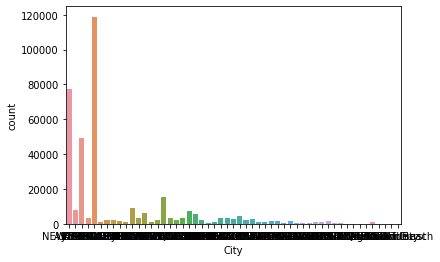

In [38]:
sns.countplot(x='City',data=nyc)

In [33]:
top_15=nyc['City'].value_counts()[:15]

In [34]:
top_15

BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
Name: City, dtype: int64

<AxesSubplot:>

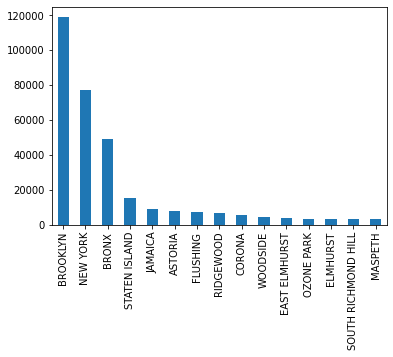

In [35]:
# bar chart 

top_15.plot(kind='bar')

In [46]:
nyc['City'].value_counts()[0:15]

BROOKLYN               118862
NEW YORK                77312
BRONX                   49171
STATEN ISLAND           15340
JAMAICA                  8932
ASTORIA                  7991
FLUSHING                 7487
RIDGEWOOD                6392
CORONA                   5383
WOODSIDE                 4357
EAST ELMHURST            3558
OZONE PARK               3446
ELMHURST                 3438
SOUTH RICHMOND HILL      3431
MASPETH                  3118
Name: City, dtype: int64

In [49]:
nyc['City'].value_counts()[-15:]

OAKLAND GARDENS     717
LITTLE NECK         712
CAMBRIA HEIGHTS     617
BELLEROSE           487
GLEN OAKS           361
ARVERNE             259
FLORAL PARK         196
Long Island City    170
Woodside            166
NEW HYDE PARK       129
CENTRAL PARK        110
QUEENS               37
BREEZY POINT         31
East Elmhurst        30
Howard Beach          1
Name: City, dtype: int64

In [52]:
nyc['City'].value_counts().tail(15)

OAKLAND GARDENS     717
LITTLE NECK         712
CAMBRIA HEIGHTS     617
BELLEROSE           487
GLEN OAKS           361
ARVERNE             259
FLORAL PARK         196
Long Island City    170
Woodside            166
NEW HYDE PARK       129
CENTRAL PARK        110
QUEENS               37
BREEZY POINT         31
East Elmhurst        30
Howard Beach          1
Name: City, dtype: int64

In [50]:
# complaint concentration over brooklyn

In [53]:
nyc.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,response_time,response_days,response_hours
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30,0.038542,0.925000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13,0.060567,1.453611
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34,0.202477,4.859444
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:27,0.323229,7.757500
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:44,0.144259,3.462222


In [57]:
brook=nyc[nyc['City']=='BROOKLYN']

In [58]:
brook['City']

5         BROOKLYN
9         BROOKLYN
13        BROOKLYN
17        BROOKLYN
18        BROOKLYN
            ...   
364539    BROOKLYN
364541    BROOKLYN
364544    BROOKLYN
364545    BROOKLYN
364546    BROOKLYN
Name: City, Length: 118862, dtype: object

In [ ]:
# complaint concentration

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

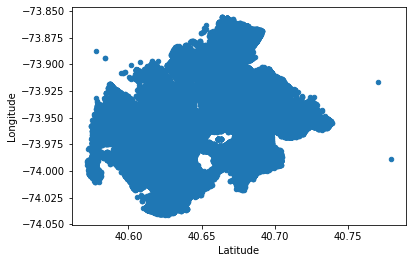

In [63]:
brook[['Latitude','Longitude']].plot(kind='scatter',x='Latitude',y='Longitude')

In [ ]:
# df.plot(kind='scatter',x='a',y='b')
# a and b are variables in the df



<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

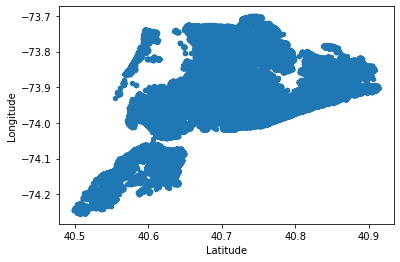

In [64]:
nyc.plot(kind='scatter',x='Latitude',y='Longitude')

In [65]:
nyc.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [66]:
brook[['X Coordinate (State Plane)',
       'Y Coordinate (State Plane)']]

,X Coordinate (State Plane),Y Coordinate (State Plane)
5,986312.0,180032.0
9,984378.0,166541.0
13,1019054.0,189780.0
17,988846.0,186711.0
18,1003628.0,163910.0
...,...,...
364539,988583.0,191117.0
364541,996180.0,199268.0
364544,991249.0,187148.0
364545,1010869.0,191545.0


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

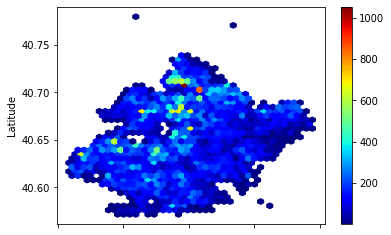

In [74]:
# hexbin plot

brook.plot(kind='hexbin',x='Longitude',y='Latitude',gridsize=40,colormap='jet',mincnt=1)

In [75]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 56 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      364558 non-null  int64          
 1   Created Date                    364558 non-null  datetime64[ns] 
 2   Closed Date                     362177 non-null  datetime64[ns] 
 3   Agency                          364558 non-null  object         
 4   Agency Name                     364558 non-null  object         
 5   Complaint Type                  364558 non-null  object         
 6   Descriptor                      358057 non-null  object         
 7   Location Type                   364425 non-null  object         
 8   Incident Zip                    361560 non-null  float64        
 9   Incident Address                312859 non-null  object         
 10  Street Name                     312859 non-n

In [76]:
# Plot a bar graph of count vs. complaint types


nyc['Complaint Type']

0         Noise - Street/Sidewalk
1                Blocked Driveway
2                Blocked Driveway
3                 Illegal Parking
4                 Illegal Parking
                   ...           
364553            Illegal Parking
364554            Noise - Vehicle
364555    Noise - Street/Sidewalk
364556           Blocked Driveway
364557           Blocked Driveway
Name: Complaint Type, Length: 364558, dtype: object

In [78]:

comp_type=nyc['Complaint Type'].value_counts()

In [79]:
comp_type

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

<AxesSubplot:>

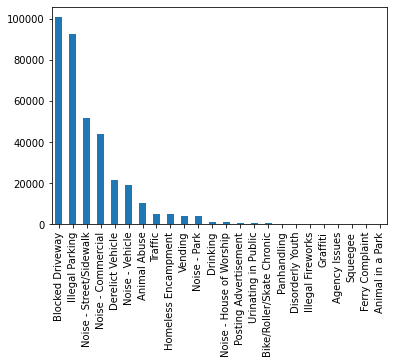

In [80]:
comp_type.plot(kind='bar')

In [81]:
# Find the top 10 types of complaints

comp_type[:10]

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

In [82]:
# Display the types of complaints in each city in a separate dataset

In [85]:
city_cnt=nyc.groupby(['City','Complaint Type']).size()

In [87]:
type(city_cnt)

pandas.core.series.Series

In [91]:
city_cnt

City      Complaint Type         
ARVERNE   Animal Abuse                46
          Blocked Driveway            50
          Derelict Vehicle            32
          Disorderly Youth             2
          Drinking                     1
                                    ... 
Woodside  Blocked Driveway            27
          Derelict Vehicle             8
          Illegal Parking            124
          Noise - Commercial           2
          Noise - Street/Sidewalk      5
Length: 777, dtype: int64

In [96]:
city_cnt.index

MultiIndex([( 'ARVERNE',             'Animal Abuse'),
            ( 'ARVERNE',         'Blocked Driveway'),
            ( 'ARVERNE',         'Derelict Vehicle'),
            ( 'ARVERNE',         'Disorderly Youth'),
            ( 'ARVERNE',                 'Drinking'),
            ( 'ARVERNE',                 'Graffiti'),
            ( 'ARVERNE',      'Homeless Encampment'),
            ( 'ARVERNE',          'Illegal Parking'),
            ( 'ARVERNE',       'Noise - Commercial'),
            ( 'ARVERNE', 'Noise - House of Worship'),
            ...
            ('WOODSIDE',  'Noise - Street/Sidewalk'),
            ('WOODSIDE',          'Noise - Vehicle'),
            ('WOODSIDE',                  'Traffic'),
            ('WOODSIDE',      'Urinating in Public'),
            ('WOODSIDE',                  'Vending'),
            ('Woodside',         'Blocked Driveway'),
            ('Woodside',         'Derelict Vehicle'),
            ('Woodside',          'Illegal Parking'),
            

In [90]:
unstack will take a multiindex on the col
city_cnt.unstack()

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Parking,Noise - Commercial,Noise - House of Worship,...,Noise - Vehicle,Panhandling,Traffic,Urinating in Public,Vending,Bike/Roller/Skate Chronic,Illegal Fireworks,Posting Advertisement,Squeegee,Animal in a Park
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46.0,50.0,32.0,2.0,1.0,1.0,4.0,62.0,2.0,14.0,...,10.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
ASTORIA,170.0,3436.0,426.0,5.0,43.0,4.0,32.0,1340.0,1653.0,21.0,...,236.0,2.0,60.0,10.0,57.0,16.0,4.0,3.0,NaN,NaN
Astoria,NaN,159.0,14.0,NaN,NaN,NaN,NaN,277.0,311.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAYSIDE,53.0,514.0,231.0,2.0,1.0,3.0,2.0,638.0,47.0,3.0,...,24.0,NaN,9.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
BELLEROSE,15.0,138.0,120.0,2.0,1.0,NaN,1.0,132.0,38.0,1.0,...,11.0,1.0,9.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN
BREEZY POINT,2.0,3.0,3.0,NaN,1.0,NaN,NaN,16.0,4.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BRONX,1971.0,17063.0,2403.0,66.0,206.0,15.0,275.0,9889.0,2945.0,90.0,...,3556.0,20.0,427.0,54.0,433.0,22.0,24.0,18.0,NaN,NaN
BROOKLYN,3191.0,36447.0,6259.0,79.0,291.0,60.0,948.0,33533.0,13860.0,389.0,...,5966.0,49.0,1258.0,155.0,575.0,124.0,61.0,58.0,NaN,NaN
CAMBRIA HEIGHTS,15.0,177.0,148.0,NaN,NaN,NaN,6.0,113.0,19.0,2.0,...,100.0,NaN,7.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [93]:
city_comp_type=pd.crosstab(index=nyc['City'],columns=nyc['Complaint Type'])

In [94]:
city_comp_type

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46,0,0,50,32,2,1,1,4,0,...,14,2,29,10,1,0,0,1,1,1
ASTORIA,170,0,16,3436,426,5,43,4,32,4,...,21,64,409,236,2,3,0,60,10,57
Astoria,0,0,0,159,14,0,0,0,0,0,...,0,0,145,0,0,0,0,0,0,0
BAYSIDE,53,0,0,514,231,2,1,3,2,0,...,3,4,17,24,0,0,0,9,0,2
BELLEROSE,15,0,1,138,120,2,1,0,1,1,...,1,1,13,11,1,1,0,9,1,0
BREEZY POINT,2,0,0,3,3,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,1971,0,22,17063,2403,66,206,15,275,24,...,90,548,9146,3556,20,18,0,427,54,433
BROOKLYN,3191,0,124,36447,6259,79,291,60,948,61,...,389,1575,13984,5966,49,58,0,1258,155,575
CAMBRIA HEIGHTS,15,0,0,177,148,0,0,0,6,1,...,2,0,29,100,0,0,0,7,0,0


In [95]:
comp_type

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

In [97]:
# . Check if the average response time across various types of complaints is significantly different

In [99]:
nyc[['Complaint Type','response_hours']]

,Complaint Type,response_hours
0,Noise - Street/Sidewalk,0.925000
1,Blocked Driveway,1.453611
2,Blocked Driveway,4.859444
3,Illegal Parking,7.757500
4,Illegal Parking,3.462222
...,...,...
364553,Illegal Parking,10.296389
364554,Noise - Vehicle,2.342778
364555,Noise - Street/Sidewalk,0.317500
364556,Blocked Driveway,2.681389


In [98]:
nyc.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [ ]:
#  a sample having x1=100

# we want to check if the sample belongs to a pop. having mean -120

In [ ]:
sampling error- that we get by 

population mean - sample mean

due to variation in population , there will be sampling error


In [ ]:
z test -
when we know the pop, mean and pop std

z= (sample mean-pop. mean)/sigma


# sigma is unknown

t test = (xbar-mu)/s/sqrt(n)

In [ ]:
# if there are more than 3 samples, we use anova

h0: mu1=mu2=mu3

ha: mu1=mu2 !=mu3 or mu1=mu3 !=mu2 or mu1 !=mu2 =mu3




In [100]:
nyc['Complaint Type'].value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

In [ ]:
# look at top 5 complaint types and find if the average response time is same or different

In [115]:
df1=nyc[nyc['Complaint Type']=='Blocked Driveway']['response_hours'].dropna()

In [105]:
df1

1         1.453611
2         4.859444
7         1.813611
9         1.395000
10        7.811111
            ...   
364548    2.563611
364549    1.161389
364550    5.976389
364556    2.681389
364557    2.783333
Name: response_hours, Length: 100881, dtype: float64

In [116]:
df2=nyc[nyc['Complaint Type']=='Illegal Parking']['response_hours'].dropna()

In [117]:
df3=nyc[nyc['Complaint Type']=='Noise - Street/Sidewalk']['response_hours'].dropna()

In [118]:
df4=nyc[nyc['Complaint Type']=='Noise - Commercial']['response_hours'].dropna()

In [119]:
df5=nyc[nyc['Complaint Type']=='Derelict Vehicle']['response_hours'].dropna()

In [120]:
# 5 types of complaints along with the response time

In [121]:
df3

0         0.925000
12        2.498889
19        0.793333
38        0.491111
54        1.504167
            ...   
364543    2.972778
364547    0.684444
364551    0.627500
364552    1.284722
364555    0.317500
Name: response_hours, Length: 51139, dtype: float64

In [122]:
# h0: the average response time is the same across different complaint types
# ha: the average response time is different

In [113]:
from scipy import stats

In [123]:
stats.f_oneway(df1,df2,df3,df4,df5)

F_onewayResult(statistic=2012.0389087633791, pvalue=0.0)

In [ ]:
# if alpha is 5% or 0.05

# p value -0.0000000000
p < alpha, so we will reject the h0

the average response time across types of complaints is different


# anova will be for a continous variable



In [128]:
nyc['Created Date'].min()

Timestamp('2015-01-01 00:00:50')

In [129]:
nyc['Created Date'].max()

Timestamp('2015-12-31 23:59:45')

<AxesSubplot:>

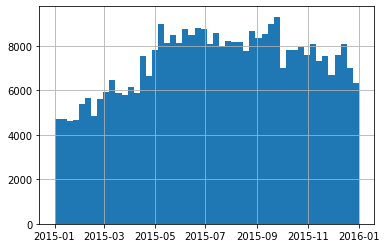

In [131]:
nyc['Created Date'].hist(bins=50)

In [135]:
nyc['Create_date1']=nyc['Created Date'].dt.date

<AxesSubplot:>

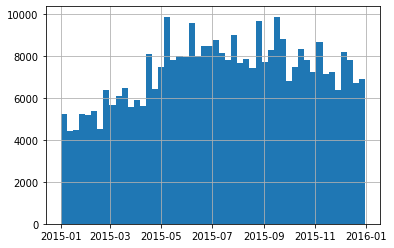

In [137]:
nyc['Create_date1'].hist(bins=50)

In [125]:
nyc['Created Date'].describe()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  364558
unique                 362018
top       2015-05-09 21:32:57
freq                        3
first     2015-01-01 00:00:50
last      2015-12-31 23:59:45
Name: Created Date, dtype: object

In [126]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 56 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique Key                      364558 non-null  int64          
 1   Created Date                    364558 non-null  datetime64[ns] 
 2   Closed Date                     362177 non-null  datetime64[ns] 
 3   Agency                          364558 non-null  object         
 4   Agency Name                     364558 non-null  object         
 5   Complaint Type                  364558 non-null  object         
 6   Descriptor                      358057 non-null  object         
 7   Location Type                   364425 non-null  object         
 8   Incident Zip                    361560 non-null  float64        
 9   Incident Address                312859 non-null  object         
 10  Street Name                     312859 non-n